## Анализ транзакций онлайн-магазина

Для анализа используется датасет с сайта Kaggle - https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business.
Датасет содержит более 500 тысяч строк с информацией об оплаченных и отмененных транзакциях, включая наименование, количество и цену товаров в каждой транзакции, а также страну, в которой проживает покупатель.

### 1. Импорт библиотек и считывание данных:


In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv', sep=',')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


### 2. Обзор датафрейма

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [4]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


### По итогам первичного анализа следует обратить внимание:
- столбец "Quantity" содержит отрицательные значения, которые означают, что транзакция была отменена
- столбец "CustomerNo" содержит пропущенные значения, так как общее количество значений в столбце 536295 меньше, чем количество строк в датафрейме 536350
- столбец с датой "Date" имеет формат object
- столбец Quantity имеет большой разброс данных (mean = 9.9, max = 80995)

### 3. Очистка данных

In [5]:
#изменение названий столбцов 
df.columns = df.columns.str.replace('N', '_n').str.lower() 
df

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [6]:
#изменение формата стоблца с датой object на datetime
df['date'] = pd.to_datetime(df['date']) 
df

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [7]:
#подсчет количества отсутствующих значений
df.isnull().sum() 

transaction_no     0
date               0
product_no         0
product_name       0
price              0
quantity           0
customer_no       55
country            0
dtype: int64

In [8]:
#подробный обзор строк с отсутствующими значениями в столбце customer_no
df[df['customer_no'].isna()]

,transaction_no,date,product_no,product_name,price,quantity,customer_no,country
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,2019-12-08,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,2019-10-04,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,2019-09-20,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,2019-09-20,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,2019-08-11,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,2019-08-11,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


In [9]:
#подсчет отрицательных значений
df[df['quantity'] < 0].shape

(8585, 8)

- количество отрицательных значений превышает отсутствующие, следовательно наличие пустых значений в столбце  customer_no не зависит от статуса отмены транзакции
- отрицательные значения уменьшают сумму итоговой суммы продаж, следовательно удаление отмененных транзакций исказит итоговую сумму
- среди отсутствующих значений имеется одно положительное (transaction_no = 558245)

Так как установить связь и восстановить значения в пустых ячейках не предоставилось возможным, столбец customer_no в анализе использоваться не будет.

In [10]:
#удаление столбца customer_no из датафрейма
df = df.drop(columns = 'customer_no')
df.head()

,transaction_no,date,product_no,product_name,price,quantity,country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom


In [11]:
#проверка количества столбцов после удаления
df.shape

(536350, 7)

In [12]:
#проверка на наличие дубликатов
df.duplicated().sum()

5200

In [13]:
#удаление дубликатов
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Итоговый датафрейм для анализа:

In [14]:
df

,transaction_no,date,product_no,product_name,price,quantity,country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom
...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,Germany
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,Germany
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,Germany
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,Germany


## Анализ
### Вопросы, которые можно задать к данному датасету:
1. Каковы тенденции продаж? В каком месяце самые высокие продажи?
2. Какие товары пользуются наибольшим спросом?
3. Какое количество товаров в среднем в транзакции? Сколько в среднем наименований разных товаров в транзакции?
4. Топ товаров по сумме продаж. Какие товары приносят самые высокие продажи, какие самые низкие? 
5. Какова доля отменных транзакций? Какие товары отменяют чаще всего?
6. Топ стран по объемам продаж. В каких странах самые низкие объемы продаж?

### 1. Каковы тенденции продаж? В каком месяце самые высокие продажи?

In [15]:
#создание нового столбца total_sum для подсчета суммы продаж по каждому продукту в транзакции
df['total_sum'] = df['price'] * df['quantity']
df.head()

,transaction_no,date,product_no,product_name,price,quantity,country,total_sum
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom,71.64


In [16]:
#создание нового столбца с периодом совершения транзакции для построения графика
df['month_year'] = df['date'].dt.strftime('%Y-%m')
df.head()

,transaction_no,date,product_no,product_name,price,quantity,country,total_sum,month_year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom,257.64,2019-12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom,383.40,2019-12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom,138.36,2019-12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom,127.80,2019-12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom,71.64,2019-12


In [17]:
#создание нового датафрейма с подсчетом сумм продаж по месяцам
sum_by_month = df.groupby(['month_year'], as_index=False)['total_sum'].sum()
sum_by_month

,month_year,total_sum
0,2018-12,4217196.99
1,2019-01,3638085.05
2,2019-02,3291955.62
3,2019-03,4339649.36
4,2019-04,3405988.90
5,2019-05,4521865.67
6,2019-06,4401861.55
7,2019-07,4495987.99
8,2019-08,4605702.03
9,2019-09,6529256.45


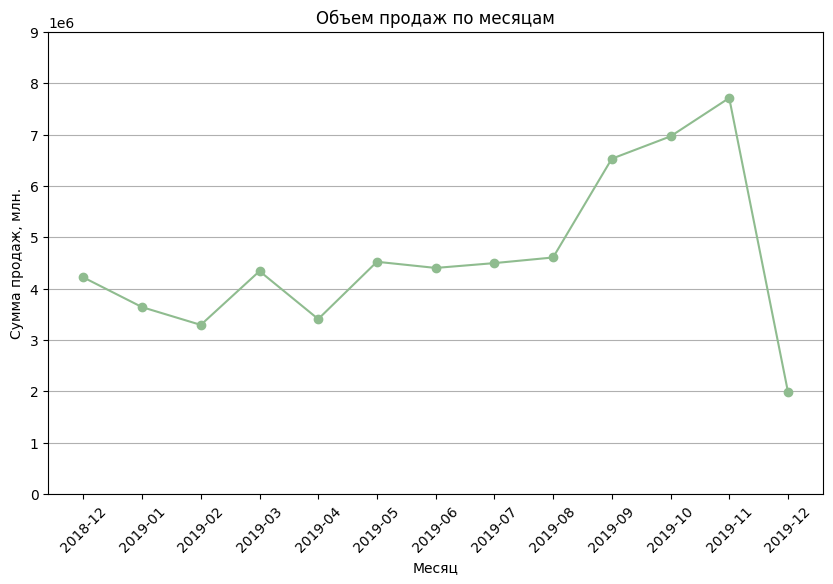

In [18]:
#построение графика для визуализации тренда
plt.figure(figsize=(10, 6))
plt.plot(sum_by_month['month_year'], sum_by_month['total_sum'], color = '#8FBC8F', marker = 'o')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж, млн.')
plt.title('Объем продаж по месяцам')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,10000000,1000000))
plt.grid(axis = 'y')
plt.show()

По графику можно сделать вывод о том, в ноябре 2019 года были самые высокие продажи. В феврале и апреле был спад, но с августа продажи имеют положительную тенденцию.
Спад в декабре 2019 года связан с тем, что данные в датасете представлены до 09.12.19

### 2. Какие товары пользуются наибольшим спросом?

,product_name,quantity
2489,Popcorn Holder,56431
3685,World War 2 Gliders Asstd Designs,53751
1679,Jumbo Bag Red Retrospot,47260
204,Assorted Colour Bird Ornament,36346
2164,Pack Of 72 Retrospot Cake Cases,36208
828,Cream Hanging Heart T-Light Holder,35359
2549,Rabbit Night Light,30634
1945,Mini Paint Set Vintage,26437
2131,Pack Of 12 London Tissues,25891
2162,Pack Of 60 Pink Paisley Cake Cases,24719


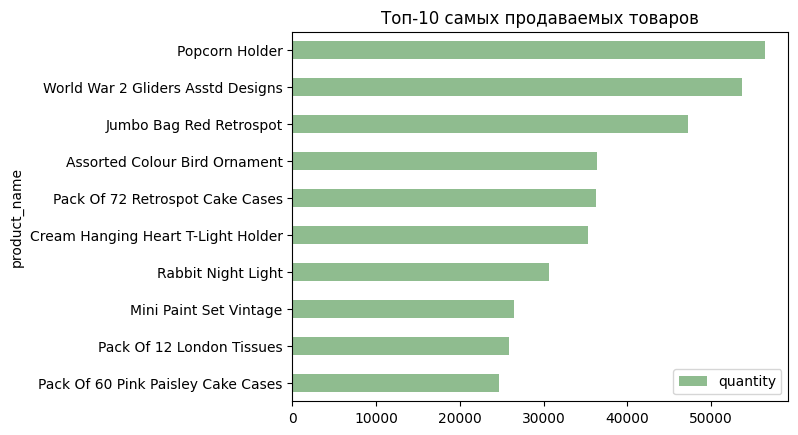

In [19]:
# топ-10 самых покупаемых товаров по количеству
top_products = df.groupby(by='product_name', as_index = False)['quantity'].sum()
top_products.sort_values('quantity', ascending = False).head(10) \
            .plot(kind = 'barh', x = 'product_name', y = 'quantity', title = 'Топ-10 самых продаваемых товаров', color = '#8FBC8F') \
            .invert_yaxis()

top_products.sort_values('quantity', ascending = False).head(10)

### 3. Какое количество товаров в среднем в транзакции? Сколько в среднем наименований разных товаров в транзакции?

Для рассчета среднего количества заказываемых товаров, необходимо проверить подробнее разброс значений, так как в первичном анализе был обнаружен большой разброс значений в столбце quantity.

count    19790.000000
mean       281.700354
std        962.191179
min          1.000000
25%         71.000000
50%        152.000000
75%        297.000000
max      80995.000000
Name: quantity, dtype: float64

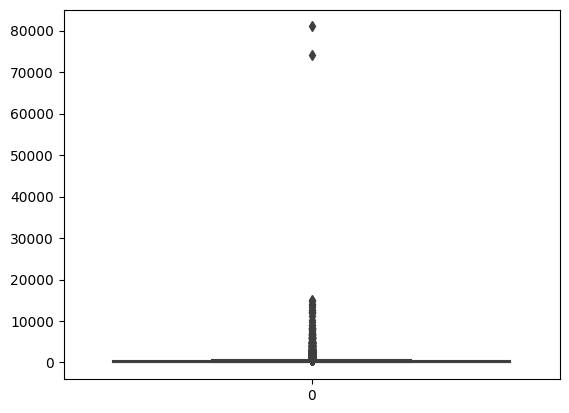

In [20]:
#группировка и суммирование количества товаров по каждой транзакции
quantity_average = df.query('quantity > 0').groupby('transaction_no').quantity.sum() 

#график boxplot для проверки выбросов по неотменненным транзакциям
sns.boxplot(quantity_average)
quantity_average.describe()

По графику видно, что кроме двух выбросов большинство значений находятся ближе к нулю, следовательно средний показатель количества товаров в транзакции будет нерепрезентативным.
Для характеристики среднего количества целесообразно использовать показатель медианы - 152.

count    19790.000000
mean        26.407377
std         47.280565
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1110.000000
Name: product_name, dtype: float64

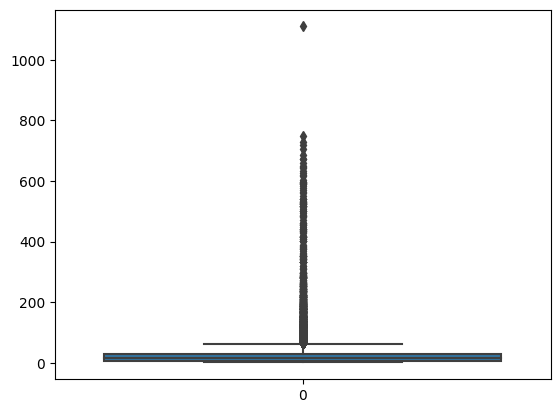

In [21]:
#группировка и расчет количества разных видов товаров по каждой транзакции
product_count = df.query('quantity > 0').groupby('transaction_no').product_name.count() 

#график boxplot для проверки выбросов по неотменненным транзакциям
sns.boxplot(product_count)
product_count.describe()

По графику boxplot, построенному для определения выбросов в категории количества наименований товаров каждой транзакции, видно, что среднее значение также не будет репрезентативным ввиду наличия большого количества выбросов. В связи с этим, для определения среднего количества наименований товаров в транзакции будет использован показатель медианы - 15.

### 4. Топ товаров по сумме продаж. Какие товары приносят самые высокие продажи, какие самые низкие? 

In [22]:
#расчет суммы продаж по каждому продукту
sales_products = df.groupby(by='product_name', as_index = False)['total_sum'].sum() \
                        .sort_values('total_sum', ascending = False)


,product_name,total_sum
2489,Popcorn Holder,583075.23
3685,World War 2 Gliders Asstd Designs,556157.63
2210,Paper Craft Little Birdie,501359.05
828,Cream Hanging Heart T-Light Holder,451163.73
204,Assorted Colour Bird Ornament,419557.68
2164,Pack Of 72 Retrospot Cake Cases,388180.66
2549,Rabbit Night Light,327293.83
1679,Jumbo Bag Red Retrospot,289853.95
2661,Regency Cakestand 3 Tier,288752.33
1945,Mini Paint Set Vintage,284870.92


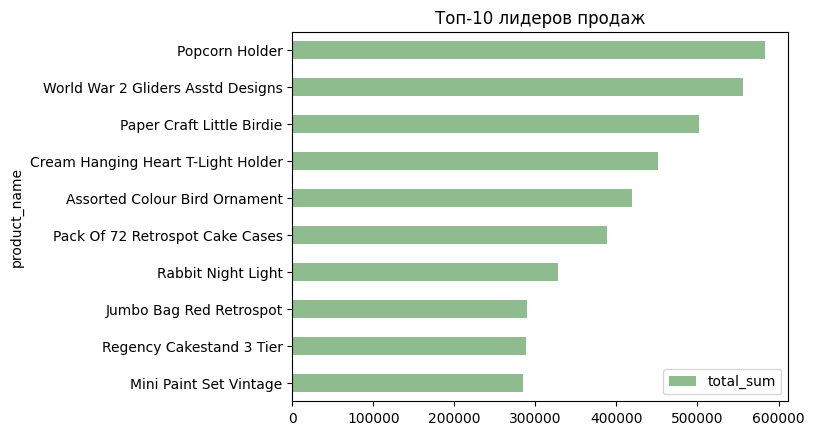

In [23]:
#топ-10 товаров по продажам
hight_sales_products = sales_products.head(10) 

hight_sales_products.plot(kind = 'barh', x = 'product_name', title = 'Топ-10 лидеров продаж', color = '#8FBC8F') \
                    .invert_yaxis()
hight_sales_products

,product_name,total_sum
3377,Travel Card Wallet Dotcomgiftshop,-2050.00
232,Assorted Tutti Frutti Round Box,-286.56
3583,White Cherry Lights,-137.36
3654,Wooden Box Advent Calendar,-119.90
440,Blue Padded Soft Mobile,-87.66
834,Cream Sweetheart Magazine Rack,-78.76
2316,Pink Cherry Lights,-68.68
3483,Vintage Gold Tinsel Reel,-64.08
2413,Pink Poodle Hanging Decoration,-59.23
177,Antique Lily Fairy Lights,-45.96


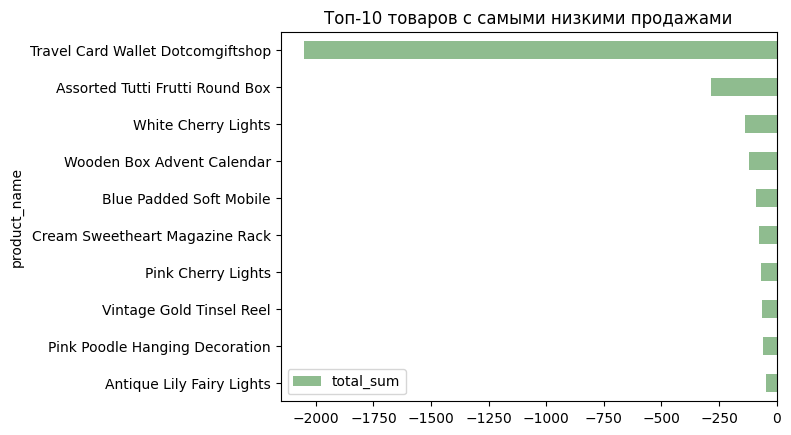

In [24]:
#товары с самыми меньшими продажами
least_sales_products = sales_products.tail(10).sort_values('total_sum', ascending = True)

least_sales_products.plot(kind = 'barh', x = 'product_name', title = 'Топ-10 товаров с самыми низкими продажами', color = '#8FBC8F') \
                    .invert_yaxis()

least_sales_products

Выявление товаров с наименьшей суммой от продаж показало, что такие товары имеют отрицательные суммы продаж. 
Вероятно, что отмена покупки сопровождается дополнительными расходами на возврат.

Для определения соотношения таких расходов к общей сумме продаж расчитаем дополнительный показатель.

In [25]:
#сумма расходов
charges = sales_products.loc[sales_products['total_sum']<0, 'total_sum'].abs().sum() 
#общая сумма продаж
sum_sales = sales_products['total_sum'].sum()

round(charges/sum_sales*100, 2)

0.01

Доля расходов по отмененным транзакциям к общей сумме продаж составляет менее 1%. Можно сделать вывод, что затраты, сопутствующие отменам заказов, не сильно влияют на общую сумму продаж.

### 5. Какова доля отменных транзакций? Какие товары отменяют чаще всего?

In [26]:
# расчет количества и доли отмененных транзакций к успешным
cancel_rate = (df.query('quantity < 0').value_counts().sum() / df.value_counts().sum()).round(2) * 100
cancel_rate

2.0

Доля отмененных транзакций составляет 2%, их доля также невелика как и показатель доли расходов, рассчитанный ранее.

,product_name,quantity
1148,Paper Craft Little Birdie,80995
994,Medium Ceramic Top Storage Jar,74494
1413,Rotating Silver Angels T-Light Hldr,9367
568,Fairy Cake Flannel Assorted Colour,3150
415,Cream Hanging Heart T-Light Holder,2578
687,Gin And Tonic Diet Metal Sign,2030
803,Herb Marker Basil,1527
594,Feltcraft Doll Molly,1447
1699,Tea Time Party Bunting,1424
1152,Paper Pocket Traveling Fan,1385


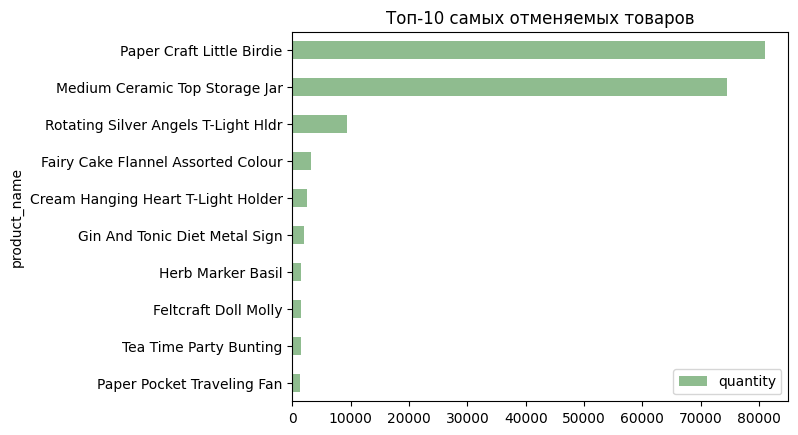

In [27]:
#расчет и визуализация самых отменяемых товаров
top_cancel_products = df[df['quantity'] < 0]
top_cancel_products.loc[:, 'quantity'] = top_cancel_products['quantity'].abs()
top_cancel_products = top_cancel_products.groupby(by='product_name', as_index = False)['quantity'] \
                                         .sum() \
                                         .sort_values('quantity', ascending = False) \
                                         .head(10)
top_cancel_products.plot(kind = 'barh', x = 'product_name', title = 'Топ-10 самых отменяемых товаров', color = '#8FBC8F') \
                   .invert_yaxis()
top_cancel_products

Два продукта имеют значительное количество отмен по сравнению с другими со значениями выше 70 000 и 80 000, как и на графиках boxplot с определением разброса значений количества товаров в транзакциях. Из чего можно сделать вывод, что следует обратить внимание на две транзакции, из-за которых компания потеряла 150 000 заказов.

In [28]:
#номера транзакций с самым большим количеством отмененных товаров
df.sort_values('quantity', ascending = True)[['transaction_no', 'quantity']].head(2)

,transaction_no,quantity
1616,C581484,-80995
475332,C541433,-74215


### 6. Топ стран по объемам продаж. В каких странах самые низкие объемы продаж?

,country,total_sum,percentage
36,United Kingdom,49837557.96,82.90
24,Netherlands,2147811.39,3.57
10,EIRE,1659053.51,2.76
14,Germany,1348561.75,2.24
13,France,1316144.75,2.19
0,Australia,988562.45,1.64
32,Sweden,396042.61,0.66
33,Switzerland,358146.32,0.60
20,Japan,283293.47,0.47
3,Belgium,271346.98,0.45


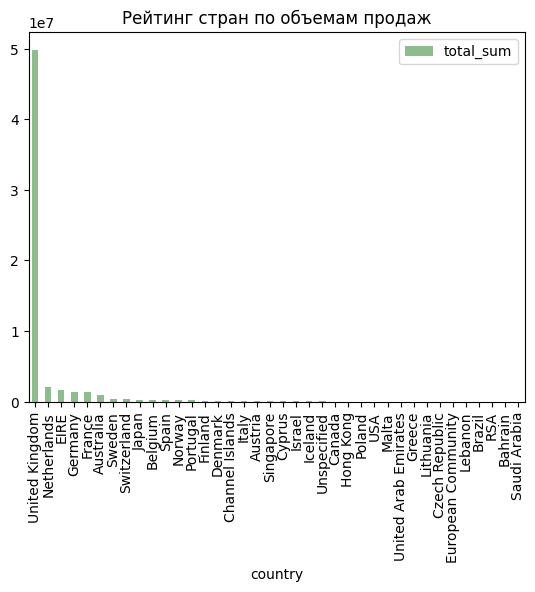

In [29]:
#рейтинг стран по продажам
sales_countries = df.groupby(by='country', as_index = False)['total_sum'] \
                              .sum() \
                              .sort_values('total_sum', ascending = False)
sales_countries['percentage'] = round(sales_countries['total_sum'] / sales_countries['total_sum'].sum() * 100, 2)
                                                                                                                              
sales_countries.plot(kind = 'bar', x = 'country', y = 'total_sum', title = 'Рейтинг стран по объемам продаж', color = '#8FBC8F') 
sales_countries

### Выводы:

1. С августа продажи имеют положительную динамику, в ноябре был отмечен наивысший объем продаж за исследуемый период, что может быть связано с сезонными факторами, праздниками или акциями.

2. Popcorn Holder - самый продаваемый товар по количеству и сумме продаж. Также в топе лидеров продаж большую часть составляют товары, которые могут быть востребованы в качестве подарков или декора для дома - это может помочь в планировании акций и специальных предложений для данной категории популярных товаров.

3. Медианное значение количества товаров в транзакциях составляет 152 единицы. Это значение представляет собой центральную точку в распределении количества товаров и является характеристикой, которая наилучшим образом описывает среднюю транзакцию в наборе данных. Таким образом, половина всех транзакций в выборке имеет количество товаров менее 152, а другая половина - более 152. 
Медианное значение количества наименований товаров в транзакциях составляет 15. Т.е. половина всех транзакций содержит менее 15 наименований различных товаров, другая половина - более 15.

4. Доля отмененных транзакций равна 2%. Затраты, связанные с отменами заказов, составляют менее 1% от всей суммы продаж.
Следует обратить внимание на транзакции №C581484 и №C541433 и исследовать причины, по которым произошла отмена 150 000 заказов.

5. United Kingdom (Великобритания) с большим отрывом лидирует по общей сумме продаж, составляя около 82,9% от всей выручки. Netherlands (Нидерланды), EIRE (Ирландия), Germany (Германия) и France (Франция) занимают существенную долю в выручке и составляют более 10% от суммы продаж.
Остальные страны имеют меньший процентный вклад в общую выручку, варьируя от менее чем 1% до нескольких десятых процента.
Исходя из процентного соотношения продаж, можно увидеть, что бизнес достаточно зависит от Великобритании, и разнообразие географии продаж может снизить риски и диверсифицировать доходы.